<h1> Food Choices - Data Wrangling </h1>

In [1]:
import pandas as pd

In [2]:
import seaborn as sn

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df_raw = pd.read_csv("food.csv")

In [6]:
df_raw.shape

(125, 54)

In [7]:
df_raw.head(3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.


<font color='brown'> <h2> Excluding open ended columns </h2> </font>

In [8]:
open_ended_columns = ['comfort_food','comfort_food_reasons','diet_current','eating_changes','father_profession','mother_profession','fav_cuisine','food_childhood','healthy_meal','ideal_diet','meals_dinner_friend','type_sports']

In [9]:
df_no_nlp = df_raw.drop(open_ended_columns,axis=1)

In [10]:
df_no_nlp.shape

(125, 42)

<font color='green' ><h2> Continuous variables</h2></font>

### GPA

In [11]:
df_no_nlp['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [12]:
df_no_nlp['GPA'] = df_no_nlp['GPA'].str.replace('[a-z]|[A-Z]|\,|\'|\s','')

In [13]:
df_no_nlp['GPA'].fillna(0,inplace=True)

In [14]:
df_no_nlp['GPA'].replace(to_replace='',value=0,inplace=True)

In [15]:
df_no_nlp['GPA'] = df_no_nlp['GPA'].astype('float')

In [16]:
gpa_mean = round(df_no_nlp['GPA'].mean(),3)

In [17]:
df_no_nlp['GPA'].replace(to_replace=0,value=gpa_mean,inplace=True)

In [18]:
df_no_nlp['GPA'].unique()

array([ 2.4  ,  3.654,  3.3  ,  3.2  ,  3.5  ,  2.25 ,  3.8  ,  3.904,
        3.4  ,  3.6  ,  3.1  ,  3.309,  4.   ,  2.2  ,  3.87 ,  3.7  ,
        3.9  ,  2.8  ,  3.   ,  3.65 ,  3.89 ,  2.9  ,  3.605,  3.83 ,
        3.292,  3.35 ,  2.6  ,  3.67 ,  3.73 ,  3.79 ,  2.71 ,  3.68 ,
        3.75 ,  3.92 ,  3.77 ,  3.63 ,  3.882])

### Calories Chicken

In [19]:
df_no_nlp['calories_chicken'].isnull().value_counts()

False    125
Name: calories_chicken, dtype: int64

### Calories day

In [20]:
df_no_nlp['calories_day'].fillna(0,inplace=True)

In [21]:
cal_day_median = df_no_nlp['calories_day'].median()

In [22]:
df_no_nlp['calories_day'].replace(to_replace=0,value=cal_day_median,inplace=True)

In [23]:
df_no_nlp['calories_day'] = df_no_nlp['calories_day'].astype('int')

In [24]:
df_no_nlp['calories_day'].value_counts()

3    82
4    23
2    20
Name: calories_day, dtype: int64

### Calories Scone

In [25]:
df_no_nlp['calories_scone'].fillna(0,inplace=True)

In [26]:
cal_scone_median = df_no_nlp['calories_scone'].median()

In [27]:
df_no_nlp['calories_scone'].replace(to_replace=0,value=cal_scone_median,inplace=True)

In [28]:
df_no_nlp['calories_scone'] = df_no_nlp['calories_scone'].astype('int')

In [29]:
df_no_nlp['calories_scone'].value_counts()

420    80
980    23
315    22
Name: calories_scone, dtype: int64

### Ethnic food
1 - Very unlikely to eat --- 5 - Very likely to eat

In [30]:
df_no_nlp['ethnic_food'].isnull().value_counts()

False    125
Name: ethnic_food, dtype: int64

In [31]:
df_no_nlp['ethnic_food'].unique()

array([1, 4, 5, 2, 3], dtype=int64)

In [32]:
df_no_nlp['ethnic_food'] = df_no_nlp['ethnic_food'].astype('int')

In [33]:
df_no_nlp['ethnic_food'].value_counts()

5    42
4    36
3    25
2    17
1     5
Name: ethnic_food, dtype: int64

### Fruit day

In [34]:
df_no_nlp['fruit_day'].isnull().value_counts()

False    125
Name: fruit_day, dtype: int64

In [35]:
df_no_nlp['fruit_day'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [36]:
df_no_nlp['fruit_day'] = df_no_nlp['fruit_day'].astype('int')

In [37]:
df_no_nlp['fruit_day'].value_counts()

5    63
4    33
3    24
2     4
1     1
Name: fruit_day, dtype: int64

### Greek food

In [38]:
df_no_nlp['greek_food'].isnull().value_counts()

False    125
Name: greek_food, dtype: int64

In [39]:
df_no_nlp['greek_food'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [40]:
df_no_nlp['greek_food'] = df_no_nlp['greek_food'].astype('int')

In [41]:
df_no_nlp['greek_food'].value_counts()

5    41
3    32
4    23
1    15
2    14
Name: greek_food, dtype: int64

### Healthy feel

In [42]:
df_no_nlp['healthy_feeling'].isnull().value_counts()

False    125
Name: healthy_feeling, dtype: int64

### Indian food

In [43]:
df_no_nlp['indian_food'].isnull().value_counts()

False    125
Name: indian_food, dtype: int64

In [44]:
df_no_nlp['indian_food'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [45]:
df_no_nlp['indian_food'] = df_no_nlp['indian_food'].astype('int')

In [46]:
df_no_nlp['indian_food'].value_counts()

5    36
3    31
1    25
2    18
4    15
Name: indian_food, dtype: int64

### Italian food

In [47]:
df_no_nlp['italian_food'].isnull().value_counts()

False    125
Name: italian_food, dtype: int64

In [48]:
df_no_nlp['italian_food'].unique()

array([5, 4, 3], dtype=int64)

In [49]:
df_no_nlp['italian_food'] = df_no_nlp['italian_food'].astype('int')

In [50]:
df_no_nlp['italian_food'].value_counts()

5    100
4     16
3      9
Name: italian_food, dtype: int64

### Life rewarding
I feel life is very rewarding - 1: Strongly agree, 10 Strongly disagree

In [51]:
df_no_nlp['life_rewarding'].unique()

array([  1.,   7.,   2.,   4.,   8.,   3.,   9.,  10.,  nan,   5.,   6.])

In [52]:
df_no_nlp['life_rewarding'][df_no_nlp['life_rewarding'].isnull()]

15   NaN
Name: life_rewarding, dtype: float64

In [53]:
df_no_nlp['life_rewarding'].fillna(0,inplace=True)

In [54]:
df_no_nlp['life_rewarding'] = df_no_nlp['life_rewarding'].astype('int')

In [55]:
median_life_rewarding = int(df_no_nlp['life_rewarding'].median())

In [56]:
df_no_nlp['life_rewarding'].replace(to_replace=0,value=median_life_rewarding,inplace=True)

In [57]:
df_no_nlp['life_rewarding'].value_counts()

1     23
8     18
3     15
7     14
2     13
9     11
5     11
10    10
4      6
6      4
Name: life_rewarding, dtype: int64

### Persian food

In [58]:
df_no_nlp['persian_food'].isnull().value_counts()

False    124
True       1
Name: persian_food, dtype: int64

In [59]:
df_no_nlp['persian_food'].unique()

array([  5.,   4.,   2.,   1.,   3.,  nan])

In [60]:
df_no_nlp['persian_food'].fillna(0,inplace=True)

In [61]:
median_persian = df_no_nlp['persian_food'].median()

In [62]:
df_no_nlp['persian_food'].replace(to_replace=0,value=median_persian,inplace=True)

In [63]:
df_no_nlp['persian_food'] = df_no_nlp['persian_food'].astype('int')

In [64]:
df_no_nlp['persian_food'].value_counts()

3    30
1    30
2    26
5    23
4    16
Name: persian_food, dtype: int64

### Thai food

In [65]:
df_no_nlp['thai_food'].isnull().value_counts()

False    125
Name: thai_food, dtype: int64

In [66]:
df_no_nlp['thai_food'].unique()

array([1, 2, 5, 4, 3], dtype=int64)

In [67]:
df_no_nlp['thai_food'] = df_no_nlp['thai_food'].astype('int')

In [68]:
df_no_nlp['thai_food'].value_counts()

5    37
3    26
4    25
1    20
2    17
Name: thai_food, dtype: int64

### Tortilla calories

In [69]:
df_no_nlp['tortilla_calories'].isnull().value_counts()

False    124
True       1
Name: tortilla_calories, dtype: int64

In [70]:
df_no_nlp['tortilla_calories'].fillna(0,inplace=True)

In [71]:
tortilla_cal_median = df_no_nlp['tortilla_calories'].median()

In [72]:
df_no_nlp['tortilla_calories'].replace(to_replace=0,value=tortilla_cal_median,inplace=True)

In [73]:
df_no_nlp['tortilla_calories'] = df_no_nlp['tortilla_calories'].astype('int')

In [74]:
df_no_nlp['tortilla_calories'].value_counts()

1165    46
940     44
725     22
580     13
Name: tortilla_calories, dtype: int64

### Turkey calories

In [75]:
df_no_nlp['turkey_calories'].isnull().value_counts()

False    125
Name: turkey_calories, dtype: int64

### Veggie day

In [76]:
df_no_nlp['veggies_day'].isnull().value_counts()

False    125
Name: veggies_day, dtype: int64

In [77]:
df_no_nlp['veggies_day'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [78]:
df_no_nlp['veggies_day'] = df_no_nlp['veggies_day'].astype('int')

In [79]:
df_no_nlp['veggies_day'].value_counts()

5    53
4    37
3    21
2    11
1     3
Name: veggies_day, dtype: int64

### Waffle calories

In [80]:
df_no_nlp['waffle_calories'].isnull().value_counts()

False    125
Name: waffle_calories, dtype: int64

### weight

In [81]:
df_no_nlp['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [82]:
df_no_nlp['weight'] = df_no_nlp['weight'].str.replace('[a-z]|[A-Z]|\,|\'|\.|\s','')

In [83]:
df_no_nlp['weight'].unique()

array(['187', '155', '', '240', '190', '180', '137', '125', '116', '110',
       '264', '123', '185', '145', '170', '135', '165', '175', '195',
       '105', '160', '167', '115', '205', nan, '128', '150', '140', '120',
       '100', '113', '168', '169', '200', '265', '192', '118', '210',
       '112', '144', '130', '127', '129', '260', '184', '230', '138', '156'], dtype=object)

In [84]:
df_no_nlp['weight'][df_no_nlp['weight'].isnull()]

32    NaN
74    NaN
Name: weight, dtype: object

In [85]:
df_no_nlp['weight'].fillna(0,inplace=True)

In [86]:
df_no_nlp['weight'].replace(to_replace='',value=0,inplace=True)

In [87]:
df_no_nlp['weight'].unique()

array(['187', '155', 0, '240', '190', '180', '137', '125', '116', '110',
       '264', '123', '185', '145', '170', '135', '165', '175', '195',
       '105', '160', '167', '115', '205', '128', '150', '140', '120',
       '100', '113', '168', '169', '200', '265', '192', '118', '210',
       '112', '144', '130', '127', '129', '260', '184', '230', '138', '156'], dtype=object)

In [88]:
save_copy = df_no_nlp.copy

In [89]:
df_no_nlp['weight'] = df_no_nlp['weight'].astype('int');

In [90]:
weight_mean = round(df_no_nlp['weight'].mean())

In [91]:
weight_mean

155

In [92]:
df_no_nlp['weight'].replace(to_replace=0,value=weight_mean,inplace=True)

In [93]:
df_no_nlp['weight'].unique()

array([187, 155, 240, 190, 180, 137, 125, 116, 110, 264, 123, 185, 145,
       170, 135, 165, 175, 195, 105, 160, 167, 115, 205, 128, 150, 140,
       120, 100, 113, 168, 169, 200, 265, 192, 118, 210, 112, 144, 130,
       127, 129, 260, 184, 230, 138, 156], dtype=int64)

<font color='orange'><h2> Categorical Variables </h2> </font>

### Gender

In [94]:
df_no_nlp['Gender'].isnull().value_counts()

False    125
Name: Gender, dtype: int64

In [95]:
df_no_nlp['Gender'] = df_no_nlp['Gender'].astype('category')

In [96]:
df_no_nlp['Gender'].cat.categories = ['Female','Male']

In [97]:
df_no_nlp['Gender'].value_counts()

Female    76
Male      49
Name: Gender, dtype: int64

### Breakfast

In [98]:
df_no_nlp['breakfast'].isnull().value_counts()

False    125
Name: breakfast, dtype: int64

In [99]:
df_no_nlp['breakfast'] = df_no_nlp['breakfast'].astype('category')

In [100]:
df_no_nlp['breakfast'].cat.categories = ['cereal','donut']

In [101]:
df_no_nlp['breakfast'].value_counts()

cereal    111
donut      14
Name: breakfast, dtype: int64

### Coffee

In [102]:
df_no_nlp['coffee'].isnull().value_counts()

False    125
Name: coffee, dtype: int64

In [103]:
df_no_nlp['coffee'] = df_no_nlp['coffee'].astype('category')

In [104]:
df_no_nlp['coffee'].cat.categories = ['frapuccino','espresso']

In [105]:
df_no_nlp['coffee'].value_counts()

espresso      94
frapuccino    31
Name: coffee, dtype: int64

### Cook

In [106]:
df_no_nlp['cook'].isnull().value_counts()

False    122
True       3
Name: cook, dtype: int64

In [107]:
df_no_nlp['cook'].unique()

array([  2.,   3.,   1.,   5.,   4.,  nan])

In [108]:
df_no_nlp['cook'].fillna(0,inplace=True)

In [109]:
median_cook = df_no_nlp['cook'].median()

In [110]:
df_no_nlp['cook'].replace(to_replace=0,value=median_cook,inplace=True)

In [111]:
df_no_nlp['cook'] = df_no_nlp['cook'].astype('category')

In [112]:
df_no_nlp['cook'].cat.categories = ['Every day','couple of times a week','not very often','only help during holidays','Never']

In [113]:
df_no_nlp['cook'].value_counts()

not very often               52
couple of times a week       34
only help during holidays    18
Every day                    13
Never                         8
Name: cook, dtype: int64

### Cuisine

In [114]:
df_no_nlp['cuisine'].isnull().value_counts()

False    108
True      17
Name: cuisine, dtype: int64

In [115]:
df_no_nlp['cuisine'].unique()

array([ nan,   1.,   3.,   2.,   6.,   4.,   5.])

In [116]:
df_no_nlp['cuisine'].fillna(0,inplace=True)

In [117]:
median_cuisine = df_no_nlp['cuisine'].median()

In [118]:
df_no_nlp['cuisine'].replace(to_replace=0,value=median_cuisine,inplace=True)

In [119]:
df_no_nlp['cuisine'] = df_no_nlp['cuisine'].astype('category')

In [120]:
df_no_nlp['cuisine'].cat.categories = ['American','Mexican.Spanish','Korean/Asian','Indian','American-inspired','other']

In [121]:
df_no_nlp['cuisine'].value_counts()

American             103
Mexican.Spanish       13
Indian                 3
Korean/Asian           3
other                  2
American-inspired      1
Name: cuisine, dtype: int64

### Drink

In [122]:
df_no_nlp['drink'].isnull().value_counts()

False    123
True       2
Name: drink, dtype: int64

In [123]:
df_no_nlp['drink'].unique()

array([  1.,   2.,  nan])

In [124]:
df_no_nlp['drink'].fillna(0,inplace=True)

In [125]:
median_drink = df_no_nlp['drink'].median()

In [126]:
df_no_nlp['drink'].replace(to_replace=0,value=median_drink,inplace=True)

In [127]:
df_no_nlp['drink'] = df_no_nlp['drink'].astype('category')

In [128]:
df_no_nlp['drink'].cat.categories = ['Orange-Juice','Soda']

In [129]:
df_no_nlp['drink'].value_counts()

Soda            71
Orange-Juice    54
Name: drink, dtype: int64

### eating out

In [130]:
df_no_nlp['eating_out'].isnull().value_counts()

False    125
Name: eating_out, dtype: int64

In [131]:
df_no_nlp['eating_out'].unique()

array([3, 2, 1, 5, 4], dtype=int64)

In [132]:
df_no_nlp['eating_out'] = df_no_nlp['eating_out'].astype('category')

In [133]:
df_no_nlp['eating_out'].cat.categories = ['Never','1-2/week','2-3/week','3-5/week','every day']

In [134]:
df_no_nlp['eating_out'].value_counts()

1-2/week     60
2-3/week     24
Never        16
3-5/week     13
every day    12
Name: eating_out, dtype: int64

### Employement

In [135]:
df_no_nlp['employment'].isnull().value_counts()

False    116
True       9
Name: employment, dtype: int64

In [136]:
df_no_nlp['employment'].unique()

array([  3.,   2.,   1.,  nan])

In [137]:
df_no_nlp['employment'].fillna(0,inplace=True)

In [138]:
median_employement = df_no_nlp['employment'].median()

In [139]:
df_no_nlp['employment'].replace(to_replace=0,value=median_employement,inplace=True)

In [140]:
df_no_nlp['employment'] = df_no_nlp['employment'].astype('category')

In [141]:
df_no_nlp['employment'].cat.categories = ['Full-time','Part-time','No']

In [142]:
df_no_nlp['employment'].value_counts()

Part-time    69
No           54
Full-time     2
Name: employment, dtype: int64

### Exercise

In [143]:
df_no_nlp['exercise'].isnull().value_counts()

False    112
True      13
Name: exercise, dtype: int64

In [144]:
df_no_nlp['exercise'].unique()

array([  1.,   2.,   3.,  nan])

In [145]:
df_no_nlp['exercise'].fillna(0,inplace=True)

In [146]:
median_exercise = df_no_nlp['exercise'].median()

In [147]:
df_no_nlp['exercise'].replace(to_replace=0,value=median_exercise,inplace=True)

In [148]:
df_no_nlp['exercise'] = df_no_nlp['exercise'].astype('category')

In [149]:
df_no_nlp['exercise'].cat.categories = ['Everyday','2/3 Week','1 Week']

In [150]:
df_no_nlp['exercise'].value_counts()

Everyday    70
2/3 Week    44
1 Week      11
Name: exercise, dtype: int64

### Father education

In [151]:
df_no_nlp['father_education'].isnull().value_counts()

False    124
True       1
Name: father_education, dtype: int64

In [152]:
df_no_nlp['father_education'].unique()

array([  5.,   2.,   4.,   1.,   3.,  nan])

In [153]:
df_no_nlp['father_education'].fillna(0,inplace=True)

In [154]:
median_father_edu = df_no_nlp['father_education'].median()

In [155]:
df_no_nlp['father_education'].replace(to_replace=0,value=median_father_edu,inplace=True)

In [156]:
df_no_nlp['father_education'] = df_no_nlp['father_education'].astype('category')

In [157]:
df_no_nlp['father_education'].cat.categories = ['less than high school','high school degree','some college degree','college degree','graduate degree']

In [158]:
df_no_nlp['father_education'].value_counts()

college degree           47
high school degree       34
graduate degree          28
some college degree      12
less than high school     4
Name: father_education, dtype: int64

### Fav food

In [159]:
df_no_nlp['fav_food'].isnull().value_counts()

False    123
True       2
Name: fav_food, dtype: int64

In [160]:
df_no_nlp['fav_food'].unique()

array([  1.,   3.,   2.,  nan])

In [161]:
df_no_nlp['fav_food'].fillna(0,inplace=True)

In [162]:
median_fav_food = df_no_nlp['fav_food'].median()

In [163]:
df_no_nlp['fav_food'].replace(to_replace=0,value=median_fav_food,inplace=True)

In [164]:
df_no_nlp['fav_food'] = df_no_nlp['fav_food'].astype('category')

In [165]:
df_no_nlp['fav_food'].cat.categories = ['Home-made','Store-bought','both']

In [166]:
df_no_nlp['fav_food'].value_counts()

Home-made       75
both            38
Store-bought    12
Name: fav_food, dtype: int64

### Fries

In [167]:
df_no_nlp['fries'].isnull().value_counts()

False    125
Name: fries, dtype: int64

In [168]:
df_no_nlp['fries'].unique()

array([2, 1], dtype=int64)

In [169]:
df_no_nlp['fries'] = df_no_nlp['fries'].astype('category')

In [170]:
df_no_nlp['fries'].cat.categories = ['McDonalds','Home-Fries']

In [171]:
df_no_nlp['fries'].value_counts()

McDonalds     114
Home-Fries     11
Name: fries, dtype: int64

### Gradelevel

In [172]:
df_no_nlp['grade_level'].isnull().value_counts()

False    125
Name: grade_level, dtype: int64

In [173]:
df_no_nlp['grade_level'].unique()

array([2, 4, 3, 1], dtype=int64)

In [174]:
df_no_nlp['grade_level'] = df_no_nlp['grade_level'].astype('category')

In [175]:
df_no_nlp['grade_level'].cat.categories = ['freshman','Sophomore','Junior','Senior']

In [176]:
df_no_nlp['grade_level'].value_counts()

freshman     37
Sophomore    32
Senior       28
Junior       28
Name: grade_level, dtype: int64

### Income

In [177]:
df_no_nlp['income'].isnull().value_counts()

False    124
True       1
Name: income, dtype: int64

In [178]:
df_no_nlp['income'].unique()

array([  5.,   4.,   6.,   1.,   3.,   2.,  nan])

In [179]:
df_no_nlp['income'].fillna(0,inplace=True)

In [180]:
median_income = df_no_nlp['income'].median()

In [181]:
df_no_nlp['income'].replace(to_replace=0,value=median_income,inplace=True)

In [182]:
df_no_nlp['income'] = df_no_nlp['income'].astype('category')

In [183]:
df_no_nlp['income'].cat.categories = ['less than $15k','$15,001 to $30k','$30,001 to $50k','$50,001 to $70k','$70,001 to $100k','higher than $100k']

In [184]:
df_no_nlp['income'].value_counts()

higher than $100k    41
$70,001 to $100k     34
$50,001 to $70k      20
$30,001 to $50k      17
$15,001 to $30k       7
less than $15k        6
Name: income, dtype: int64

### Marital Status

In [185]:
df_no_nlp['marital_status'].isnull().value_counts()

False    124
True       1
Name: marital_status, dtype: int64

In [186]:
df_no_nlp['marital_status'].unique()

array([  1.,   2.,   4.,  nan])

In [187]:
df_no_nlp['marital_status'].fillna(0,inplace=True)

In [188]:
median_marital = df_no_nlp['marital_status'].median()

In [189]:
df_no_nlp['marital_status'].replace(to_replace=0,value=median_marital,inplace=True)

In [190]:
df_no_nlp['marital_status'] = df_no_nlp['marital_status'].astype('category')

In [191]:
df_no_nlp['marital_status'].cat.categories = ['Single','In-relation','Married']

In [192]:
df_no_nlp['marital_status'].value_counts()

Single         65
In-relation    59
Married         1
Name: marital_status, dtype: int64

### Mother education

In [193]:
df_no_nlp['mother_education'].isnull().value_counts()

False    122
True       3
Name: mother_education, dtype: int64

In [194]:
df_no_nlp['mother_education'].unique()

array([  1.,   4.,   2.,   5.,   3.,  nan])

In [195]:
df_no_nlp['mother_education'].fillna(0,inplace=True)

In [196]:
median_mother_edu = df_no_nlp['mother_education'].median()

In [197]:
df_no_nlp['mother_education'].replace(to_replace=0,value=median_mother_edu,inplace=True)

In [198]:
df_no_nlp['mother_education'] = df_no_nlp['mother_education'].astype('category')

In [199]:
df_no_nlp['mother_education'].cat.categories = ['less than high school','high school degree','some college degree','college degree','graduate degree']

In [200]:
df_no_nlp['mother_education'].value_counts()

college degree           49
high school degree       30
graduate degree          23
some college degree      18
less than high school     5
Name: mother_education, dtype: int64

### Nutritional Check

In [201]:
df_no_nlp['nutritional_check'].isnull().value_counts()

False    125
Name: nutritional_check, dtype: int64

In [202]:
df_no_nlp['nutritional_check'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [203]:
df_no_nlp['nutritional_check'] = df_no_nlp['nutritional_check'].astype('category')

In [204]:
df_no_nlp['nutritional_check'].cat.categories = ['never','certain products only','very rarely','most products','everything']

In [205]:
df_no_nlp['nutritional_check'].value_counts()

most products            43
certain products only    36
very rarely              20
everything               16
never                    10
Name: nutritional_check, dtype: int64

### On-off campus

In [206]:
df_no_nlp['on_off_campus'].isnull().value_counts()

False    124
True       1
Name: on_off_campus, dtype: int64

In [207]:
df_no_nlp['on_off_campus'].unique()

array([  1.,   2.,   3.,   4.,  nan])

In [208]:
df_no_nlp['on_off_campus'].fillna(0,inplace=True)

In [209]:
median_on_off = df_no_nlp['on_off_campus'].median()

In [210]:
df_no_nlp['on_off_campus'].replace(to_replace=0,value=median_on_off,inplace=True)

In [211]:
df_no_nlp['on_off_campus'] = df_no_nlp['on_off_campus'].astype('category')

In [212]:
df_no_nlp['on_off_campus'].cat.categories = ['On campus','Rent out of campus','Live with parents','own house']

In [213]:
df_no_nlp['on_off_campus'].value_counts()

On campus             98
Rent out of campus    16
Live with parents      9
own house              2
Name: on_off_campus, dtype: int64

### Parents cook

In [214]:
df_no_nlp['parents_cook'].isnull().value_counts()

False    125
Name: parents_cook, dtype: int64

In [215]:
df_no_nlp['parents_cook'].unique()

array([1, 2, 3, 5], dtype=int64)

In [216]:
df_no_nlp['parents_cook'] = df_no_nlp['parents_cook'].astype('category')

In [217]:
df_no_nlp['parents_cook'].cat.categories = ['Almost everyday','2-3/week', '1-2/week','Never']

In [218]:
df_no_nlp['parents_cook'].value_counts()

Almost everyday    75
2-3/week           36
1-2/week           13
Never               1
Name: parents_cook, dtype: int64

### Pay meal out

In [219]:
df_no_nlp['pay_meal_out'].isnull().value_counts()

False    125
Name: pay_meal_out, dtype: int64

In [220]:
df_no_nlp['pay_meal_out'].unique()

array([2, 4, 3, 5, 6], dtype=int64)

In [221]:
df_no_nlp['pay_meal_out'] = df_no_nlp['pay_meal_out'].astype('category')

In [222]:
df_no_nlp['pay_meal_out'].cat.categories = ['$5.01 to $10','$10.01 to $20','$20.01 to $30','$30.01 to $40','more than $40.01']

In [223]:
df_no_nlp['pay_meal_out'].value_counts()

$10.01 to $20       67
$20.01 to $30       22
$5.01 to $10        17
$30.01 to $40       11
more than $40.01     8
Name: pay_meal_out, dtype: int64

### Self perception weight

In [224]:
df_no_nlp['self_perception_weight'].isnull().value_counts()

False    124
True       1
Name: self_perception_weight, dtype: int64

In [225]:
df_no_nlp['self_perception_weight'].unique()

array([  3.,   6.,   5.,   4.,   1.,   2.,  nan])

In [226]:
df_no_nlp['self_perception_weight'].fillna(0,inplace=True)

In [227]:
median_self = df_no_nlp['self_perception_weight'].median()

In [228]:
df_no_nlp['self_perception_weight'].replace(to_replace=0,value=median_self,inplace=True)

In [229]:
df_no_nlp['self_perception_weight'] = df_no_nlp['self_perception_weight'].astype('category')

In [230]:
df_no_nlp['self_perception_weight'].cat.categories = ['slim','very fit','just right','slight overweight','overweight','idont see']

In [231]:
df_no_nlp['self_perception_weight'].value_counts()

just right           46
slight overweight    31
very fit             31
overweight            6
slim                  6
idont see             5
Name: self_perception_weight, dtype: int64

### Soup

In [232]:
df_no_nlp['soup'].isnull().value_counts()

False    124
True       1
Name: soup, dtype: int64

In [233]:
df_no_nlp['soup'].unique()

array([  1.,   2.,  nan])

In [234]:
df_no_nlp['soup'].fillna(0,inplace=True)

In [235]:
median_soup = df_no_nlp['soup'].median()

In [236]:
df_no_nlp['soup'].replace(to_replace=0,value=median_soup,inplace=True)

In [237]:
df_no_nlp['soup'] = df_no_nlp['soup'].astype('category')

In [238]:
df_no_nlp['soup'].cat.categories = ['veggie-soup','creamy-soup']

In [239]:
df_no_nlp['soup'].value_counts()

veggie-soup    98
creamy-soup    27
Name: soup, dtype: int64

### Sports

In [240]:
df_no_nlp['sports'].isnull().value_counts()

False    123
True       2
Name: sports, dtype: int64

In [241]:
df_no_nlp['sports'].unique()

array([  1.,   2.,  nan])

In [242]:
df_no_nlp['sports'].fillna(0,inplace=True)

In [243]:
median_sports = df_no_nlp['sports'].median()

In [244]:
df_no_nlp['sports'].replace(to_replace=0,value=median_sports,inplace=True)

In [245]:
df_no_nlp['sports'] = df_no_nlp['sports'].astype('category')

In [246]:
df_no_nlp['sports'].cat.categories = ['Yes','No']

In [247]:
df_no_nlp['sports'].value_counts()

Yes    77
No     48
Name: sports, dtype: int64

### Vitamins

In [248]:
df_no_nlp['vitamins'].isnull().value_counts()

False    125
Name: vitamins, dtype: int64

In [249]:
df_no_nlp['vitamins'] = df_no_nlp['vitamins'].astype('category')

In [250]:
df_no_nlp['vitamins'].cat.categories = ['yes','no']

In [251]:
df_no_nlp['vitamins'].value_counts()

no     64
yes    61
Name: vitamins, dtype: int64

## FInal look at the data

In [266]:
df_no_nlp.isnull().sum().value_counts()

0    42
dtype: int64

<font color='burgundy'> <h2> Correlation Matrix </h2> </font>

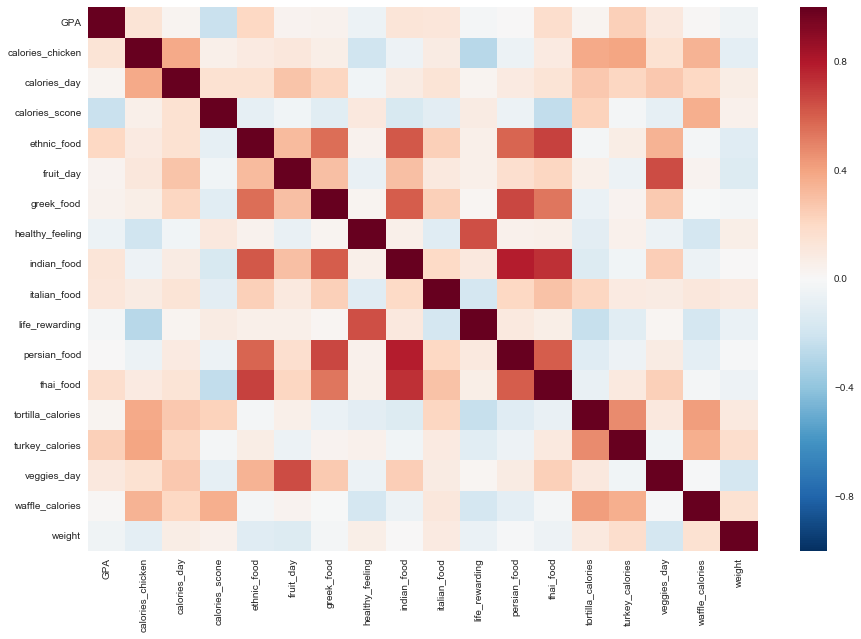

In [253]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sn.heatmap(df_no_nlp.corr())

In [255]:
df_no_nlp.to_csv('tidy_food.csv',index=False)